# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

A = np.random.randint(0, 100, size=(200, 50))
A

array([[33,  0, 60, ..., 80, 31, 22],
       [83, 42, 66, ..., 95, 66, 43],
       [38, 24, 14, ..., 43, 80, 16],
       ...,
       [ 4, 79, 61, ..., 40, 15, 14],
       [17, 80, 11, ..., 68, 60, 75],
       [14, 24, 33, ..., 27, 78, 62]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [2]:
A[:,np.random.permutation(A.shape[1]) - 1]

array([[84, 97, 22, ..., 35, 25, 80],
       [53, 28, 61, ..., 18, 56, 95],
       [71,  5, 82, ..., 66, 55, 43],
       ...,
       [20, 47, 56, ..., 84, 42, 40],
       [30,  0, 95, ..., 98, 50, 68],
       [18, 42, 45, ..., 51, 94, 27]])

# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

In [3]:
A[np.sum(A[:,0:A.shape[1]: 2], axis=1) > np.mean(np.sum(A[:, 1:A.shape[1]: 2], axis=1)),: ]

array([[83, 42, 66, ..., 95, 66, 43],
       [38, 24, 14, ..., 43, 80, 16],
       [94, 55, 34, ..., 44, 19, 58],
       ...,
       [50, 50, 70, ..., 83, 89, 95],
       [66, 56, 29, ..., 73, 88, 80],
       [17, 80, 11, ..., 68, 60, 75]])

# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [4]:
np.argmax(np.max(A, axis=1) - np.min(A, axis=1))

2

# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [5]:
np.argsort(A, axis=None).reshape(A.shape) + 1

array([[  78, 2098, 3140, ..., 7513, 6761, 8903],
       [ 453, 4184, 4155, ..., 1345,  651, 8182],
       [6225, 9973, 8280, ..., 1433, 1435, 1095],
       ...,
       [9932, 5541, 4030, ..., 3717, 2616, 5435],
       [6994, 2615,  376, ..., 5403, 6578, 8584],
       [2378, 6764, 8390, ..., 4726, 7143, 4995]], dtype=int64)

# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массивы, в каждой строке которого максимальный элементы равен $1$, минимальный - $0$. 

In [6]:
(A - np.min(A, axis=1).reshape(-1,1)) / (np.max(A, axis=1).reshape(-1,1) - np.min(A, axis=1).reshape(-1,1))

array([[0.34020619, 0.        , 0.6185567 , ..., 0.82474227, 0.31958763,
        0.22680412],
       [0.8556701 , 0.43298969, 0.68041237, ..., 0.97938144, 0.68041237,
        0.44329897],
       [0.38383838, 0.24242424, 0.14141414, ..., 0.43434343, 0.80808081,
        0.16161616],
       ...,
       [0.03225806, 0.83870968, 0.64516129, ..., 0.41935484, 0.15053763,
        0.13978495],
       [0.17346939, 0.81632653, 0.1122449 , ..., 0.69387755, 0.6122449 ,
        0.76530612],
       [0.14285714, 0.24489796, 0.33673469, ..., 0.2755102 , 0.79591837,
        0.63265306]])

# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [7]:
A * (np.arange(1, 11).reshape(-1,1,1))

array([[[ 33,   0,  60, ...,  80,  31,  22],
        [ 83,  42,  66, ...,  95,  66,  43],
        [ 38,  24,  14, ...,  43,  80,  16],
        ...,
        [  4,  79,  61, ...,  40,  15,  14],
        [ 17,  80,  11, ...,  68,  60,  75],
        [ 14,  24,  33, ...,  27,  78,  62]],

       [[ 66,   0, 120, ..., 160,  62,  44],
        [166,  84, 132, ..., 190, 132,  86],
        [ 76,  48,  28, ...,  86, 160,  32],
        ...,
        [  8, 158, 122, ...,  80,  30,  28],
        [ 34, 160,  22, ..., 136, 120, 150],
        [ 28,  48,  66, ...,  54, 156, 124]],

       [[ 99,   0, 180, ..., 240,  93,  66],
        [249, 126, 198, ..., 285, 198, 129],
        [114,  72,  42, ..., 129, 240,  48],
        ...,
        [ 12, 237, 183, ..., 120,  45,  42],
        [ 51, 240,  33, ..., 204, 180, 225],
        [ 42,  72,  99, ...,  81, 234, 186]],

       ...,

       [[264,   0, 480, ..., 640, 248, 176],
        [664, 336, 528, ..., 760, 528, 344],
        [304, 192, 112, ..., 344, 640, 128

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [8]:
np.concatenate((A[:,0::2],A[:,1:A.shape[1]:2]), axis=1)

array([[33, 60, 81, ..., 35, 80, 22],
       [83, 66, 78, ..., 80, 95, 43],
       [38, 14, 47, ..., 51, 43, 16],
       ...,
       [ 4, 61, 22, ..., 76, 40, 14],
       [17, 11, 26, ..., 66, 68, 75],
       [14, 33, 57, ..., 45, 27, 62]])

# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [9]:
A[np.all(A > 5, axis=1)].shape[0]

13

# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который является средним этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [10]:
np.mean(np.split(A, 10, axis=0),axis=0)

array([[50.9, 41.7, 38.7, 62.4, 54. , 58.8, 51. , 52.1, 46.5, 42.6, 62. ,
        56. , 60.8, 58.2, 51.7, 44.4, 33.7, 51.1, 61.9, 50.7, 57.6, 64. ,
        43. , 44.6, 42.1, 60.9, 35.6, 53.1, 39.5, 57. , 60.7, 53.3, 39.6,
        30.6, 36.5, 57.6, 39.4, 49.8, 52.4, 42.3, 45.1, 42.2, 37.3, 49.8,
        60.7, 37.1, 62.3, 63.3, 25.4, 33.2],
       [60.3, 51.9, 47.8, 50. , 47.8, 39.7, 40.6, 57.6, 28.5, 59. , 40.6,
        48.6, 43.7, 47.6, 42.9, 45.7, 63. , 40.8, 43.7, 53.7, 52.5, 47.4,
        34.7, 50.4, 48. , 64.2, 63.6, 46.4, 60.1, 50.3, 39.6, 42.1, 58.1,
        53.1, 61. , 49.8, 58.3, 45.4, 42.9, 51. , 61.7, 58.1, 50.8, 43.9,
        39.4, 65.5, 42.7, 48.2, 48.4, 52.6],
       [48.9, 44.2, 51.9, 49.7, 67.4, 50.8, 31.5, 49.4, 31.5, 62.6, 53.4,
        46.5, 44.9, 47. , 39.5, 58.3, 47.9, 40.7, 48.6, 57.7, 49.4, 48.4,
        54.7, 52.7, 64.6, 45.4, 52.1, 31. , 65.6, 51.8, 58.5, 40.6, 53.3,
        41.5, 67.5, 57.6, 51.9, 43.3, 47.2, 64.3, 41.7, 58.1, 76.8, 50. ,
        68. , 33.9, 62

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [11]:
A.flatten()[np.sort(np.unique(A.flatten(),return_index=True)[1])]

array([33,  0, 60, 91, 81, 95, 31, 75, 13, 50, 28,  6, 84,  2, 35, 68, 30,
       25, 37, 34, 69, 53, 78, 64, 19, 45, 74, 93, 27,  3, 20, 97, 29, 22,
       54, 77, 83, 65, 80, 42, 66, 23, 39, 72, 70, 96, 18,  8,  5, 56, 52,
       57, 38, 47, 89, 73, 15, 61, 76, 88, 67, 43, 24, 14, 46, 71, 41, 79,
       87, 55, 92, 62, 21, 44, 82, 99, 51, 16, 94, 63, 32, 48, 40, 49, 58,
       17, 98, 85, 26,  4, 36, 59,  9, 90,  7, 12, 86, 10,  1, 11])

# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [12]:
np.linalg.norm(A - np.mean(A, axis=0), axis=1)

array([200.18116114, 181.55444714, 194.10200224, 177.62924105,
       198.94214555, 187.24512617, 206.11076458, 223.51388609,
       210.71276011, 210.22377904, 201.85996947, 204.21497809,
       206.30588279, 199.84956161, 184.47337823, 206.04998732,
       196.96724924, 226.27672721, 198.78200943, 204.15202001,
       197.80770277, 195.09996739, 211.45393653, 202.58039706,
       188.05945144, 202.27263106, 188.56255534, 203.72996165,
       207.07526959, 207.01866407, 199.58784351, 198.68325867,
       204.26846863, 223.38636323, 192.42218499, 197.01720045,
       196.9614614 , 198.83371765, 204.49216923, 179.72581138,
       192.49477207, 208.94467515, 194.55309629, 219.00924016,
       211.38069277, 192.2005132 , 194.79090655, 211.39500296,
       198.76485422, 194.90042913, 205.2303761 , 184.76892941,
       214.02992145, 195.29710002, 193.7344246 , 224.54577991,
       206.54473432, 192.24769771, 185.30404009, 203.51205683,
       220.75189076, 204.841908  , 206.40660667, 200.37

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [13]:
np.where(A > 50, 2 * A, 3 * A)

array([[ 99,   0, 120, ..., 160,  93,  66],
       [166, 126, 132, ..., 190, 132, 129],
       [114,  72,  42, ..., 129, 160,  48],
       ...,
       [ 12, 158, 122, ..., 120,  45,  42],
       [ 51, 160,  33, ..., 136, 120, 150],
       [ 42,  72,  99, ...,  81, 156, 124]])

# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте три новых массива, подсчитав скользящие средние по окнам $3$, $5$, $10$. Найдите сумму этих массивов, выровнив из размерности нулями справа

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [14]:
def MovingAverage(A: np.ndarray, k: int) -> np.ndarray:
    C = np.cumsum(A)
    return (C[k-1:] - np.concatenate((np.zeros((1,)), C[:-k]))) / k
A3 = MovingAverage(A.flatten(), 3)
A5 = MovingAverage(A.flatten(), 5)
A10 = MovingAverage(A.flatten(), 10)
max_shape = np.max([A3.shape[0], A5.shape[0], A10.shape[0]])
(np.concatenate((A3, np.zeros(max_shape - A3.shape[0],))) +
 np.concatenate((A5, np.zeros(max_shape - A5.shape[0],))) +
 np.concatenate((A10, np.zeros(max_shape - A10.shape[0],))))

array([136.9       , 168.13333333, 201.93333333, ..., 103.73333333,
        58.33333333,  55.66666667])

# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

In [15]:
def foo(x: np.ndarray) -> np.ndarray:
    return (5 * np.sin(2 * x) - np.cos(x) ** 2 - 1 + np.abs(x ** 3) - x ** 2) / (x ** 2 + 1)

Из-за модуля при дифференцировании Sympy выражение которое нельзя сконвертировать в обычную lambda функцию, работающую с числами.

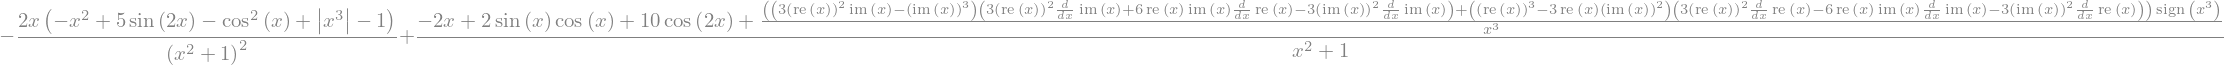

In [56]:
import sympy
from sympy import Symbol, sin, cos, lambdify
import scipy as sp
sympy.init_printing()
sym_x = Symbol('x')
sym_y = (5 * sin(2 * sym_x) - cos(sym_x) ** 2 - 1 + np.abs(sym_x ** 3) - sym_x ** 2) / (sym_x ** 2 + 1)
diff_y = sympy.diff(sym_y, sym_x)
diff_y

In [57]:
diff = lambdify(sym_x, diff_y.doit(), modules=np)
diff(1)

NameError: name 'Derivative' is not defined

Возьмем производные отдельно в трех областях:

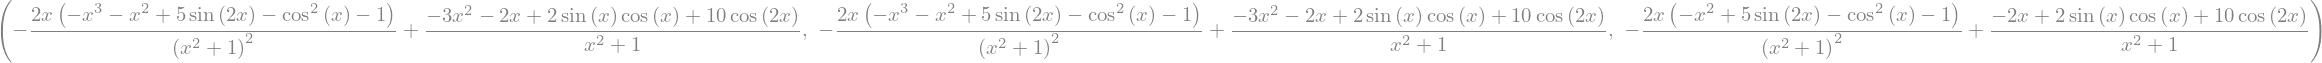

In [61]:
sym_x = Symbol('x')
sym_y_neg = (5 * sin(2 * sym_x) - cos(sym_x) ** 2 - 1 - sym_x ** 3 - sym_x ** 2) / (sym_x ** 2 + 1)
sym_y_pos = (5 * sin(2 * sym_x) - cos(sym_x) ** 2 - 1 - sym_x ** 3 - sym_x ** 2) / (sym_x ** 2 + 1)
sym_y_zero = (5 * sin(2 * sym_x) - cos(sym_x) ** 2 - 1  - sym_x ** 2) / (sym_x ** 2 + 1)
diff_y_neg = sympy.diff(sym_y_neg, sym_x)
diff_y_pos = sympy.diff(sym_y_pos, sym_x)
diff_y_zero = sympy.diff(sym_y_zero, sym_x)
diff_y_neg, diff_y_pos, diff_y_zero

In [62]:
diff_neg = lambdify(sym_x, diff_y_neg, modules=np)
diff_pos = lambdify(sym_x, diff_y_pos, modules=np)
diff_zero = lambdify(sym_x, diff_y_zero, modules=np)

In [63]:
def diff_foo(x):
    if x < 0:
        return diff_neg(x)
    if x > 0:
        return diff_pos(x)
    else:
        return diff_zero(x)

Минимум:

In [64]:
x_min = sp.optimize.fmin_bfgs(foo, 0)

Optimization terminated successfully.
         Current function value: -4.882074
         Iterations: 6
         Function evaluations: 16
         Gradient evaluations: 8


Построение графиков:

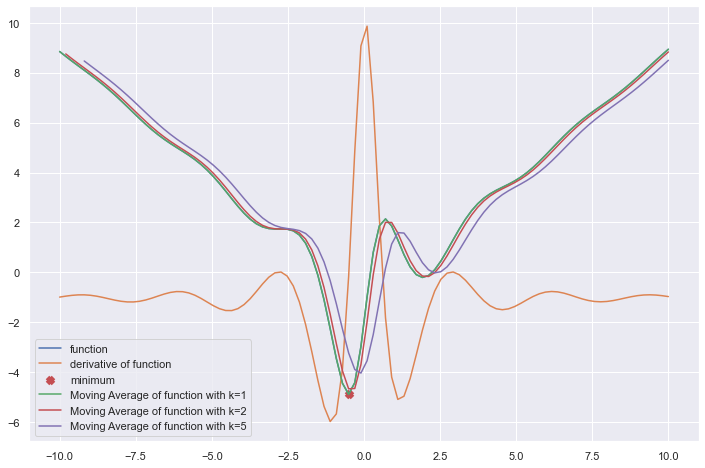

In [67]:
sns.set
x = np.linspace(-10,10,100)
plt.rcParams['figure.figsize'] = 12, 8
y_diff = np.array([diff_foo(i) for i in x])
y = foo(x)
plt.plot(x, y, label='function')
plt.plot(x, y_diff, label='derivative of function')
plt.scatter(x_min, -4.882074, marker='x', c='r',label='minimum', linewidths=5)
y_ma = []
for k in (1,2,5):
    y_ma.append(MovingAverage(y, k))
    plt.plot(x[k-1:], y_ma[-1], label = f'Moving Average of function with k={k}')
plt.legend()

# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [53]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return res
          
sample([50, 3, 1, 7, 20], 5)   

Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

In [54]:
def sample_np(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    x = np.array(x)
    c_vec = np.sum(x)  * np.random.random(size=c)
    temp = np.cumsum(x) - c_vec.reshape(-1, 1)
    return np.argmax(temp > 0, axis=1)
sample_np([50, 3, 1, 7, 20], 5) 

array([0, 4, 4, 0, 4], dtype=int64)

Используем критерий однородности Уилкоксона для проверки гипотезы о статистической однородности двух выборок, сэмплированных с помощью разных функций, уровень значимости возьмем 0.05

In [55]:
from scipy import stats
samples = list(np.random.randint(0, 10, size=(10,)))
samples1 = sample(samples, 200)
samples2 = sample_np(samples, 200)
stats.ranksums(samples1, samples2, alternative='two-sided')

RanksumsResult(statistic=0.011244283668245394, pvalue=0.9910285487135028)

In [56]:
stats.mannwhitneyu(samples1, samples2, alternative='two-sided') # еще критерий манна-уитни

MannwhitneyuResult(statistic=20013.0, pvalue=0.9913004550937504)

pvalue > 0.05 значит гипотезу об однородности выборок принимаем, функции распределения генеральных совокупностей выборок одинаковы.

# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [57]:
import random 

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position

walk(10_000)

Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном числе запусков. 

In [58]:
import time

def walk_np(n: int):
    return np.sum(np.random.choice([-3, -1, 0, 2, 3], n))
start_time = time.time()
walk(10_000)
print(f'time without numpy {time.time() - start_time}')
start_time = time.time()
walk_np(10_000)
print(f'time with numpy {time.time() - start_time}')

time without numpy 0.00786447525024414
time with numpy 0.0


In [59]:
q1, q2 = 0, 0
a1 = []
a2 = []
for i in range(1000):
    start_time = time.time()
    walk(10_000)
    q1 += time.time() - start_time
    a1.append(walk(10_000))
    start_time = time.time()
    walk_np(10_000)
    q2+=time.time() - start_time
    a2.append(walk_np(10_000))
print(q1/1000, q2/1000)

0.005339327335357666 0.00023632287979125977


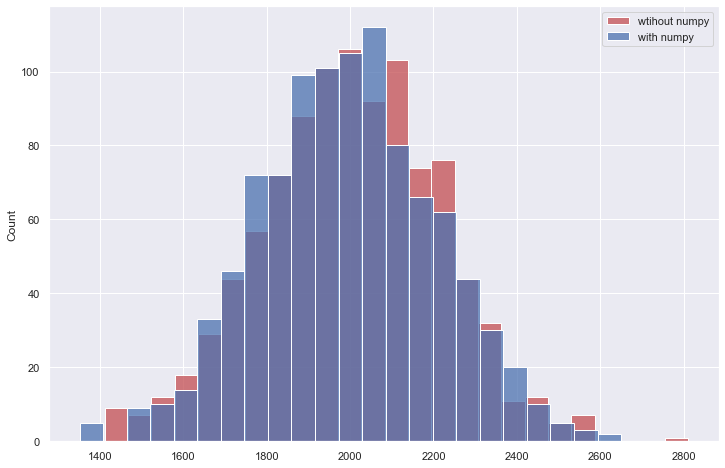

In [60]:
sns.histplot(a1, label = 'wtihout numpy',color='r')
sns.histplot(a2, label = 'with numpy')
plt.legend()

# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [61]:
import numpy.typing as npt

def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))
strange_conv(a)


Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.

Функция с использованием cython

In [62]:
%%cython
cimport numpy as cnp
cnp.import_array()
ctypedef cnp.float64_t DTYPE_t
def strange_conv_c(cnp.ndarray a):
    cdef int x = a.shape[0]
    cdef int y = a.shape[1]
    cdef float c = 0
    cdef float t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t

Функция с использованием taichi

In [89]:
import taichi as ti

ti.init(arch=ti.gpu)

@ti.kernel
def strange_conv_taichi(a: ti.types.ndarray()) -> ti.types.float64:
    x = a.shape[0] - 3
    y = a.shape[1] - 5
    c = 0
    t = 1.
    for i in ti.ndrange(y):
        for j in  ti.ndrange(x):
            c = 1.5 * a[i+1, j+2] - a[i+5, j+3] * a[i, j] + 0.2 * a[i+4, j]
            t = 0.2 * t + 0.8 * c
    return t

[Taichi] Starting on arch=cuda


In [91]:
a = np.random.random((10000, 10000))
start_time = time.time()
strange_conv(a)
print(f'time for basic function {time.time() - start_time}')
start_time = time.time()
strange_conv_c(a)
print(f'time for function using cython {time.time() - start_time}')
start_time = time.time()
strange_conv_taichi(a)
print(f'time for function using taichi {time.time() - start_time}')

time for basic function 15.321913719177246
time for function using cython 9.952906608581543
time for function using taichi 0.938169002532959
